In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

In [3]:
# アイスクリーム消費データ
df_ice = pd.read_csv('../../data/chapter01/icecream.csv')

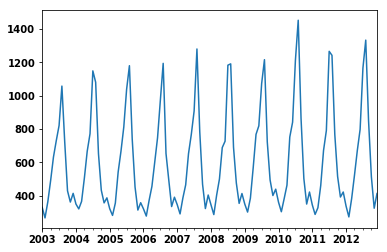

In [4]:
# 月ごとの家庭平均消費額のみを抽出し
# インデックスを2003年1月からの月ごとにする
y = pd.Series(df_ice.expenditure_yen.values, 
              index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [5]:
# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.308955850882182, 0.1692244861968732, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484143)
ct:
(-1.7145601999710613, 0.7444294601457631, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c:
(-0.6539247687694246, 0.8583259363632654, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc:
(1.6310949179759104, 0.9751761218376868, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328063)


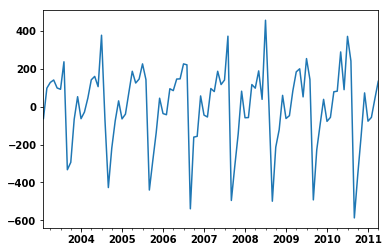

In [6]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [7]:
y_diff.count()

99

In [8]:
ctt = stattools.adfuller(y_diff, regression="ctt")
ct = stattools.adfuller(y_diff, regression="ct")
c = stattools.adfuller(y_diff, regression="c")
nc = stattools.adfuller(y_diff, regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-20.494138790574038, 0.0, 10, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 994.1683226214955)
ct:
(-20.51282538674092, 0.0, 10, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 992.6851493902558)
c:
(-20.635999245555652, 0.0, 10, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 990.9785010415187)
nc:
(-20.33772445910238, 0.0, 10, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 991.6754513068396)


In [9]:
model = ar_model.AR(y_diff)
for i in range(20):
    results = model.fit(maxlag=i+1)
    print('lag = ', i+1, 'aic : ', results.aic)

lag =  1 aic :  10.623349835083612
lag =  2 aic :  10.605625887136187
lag =  3 aic :  10.631794365499909
lag =  4 aic :  10.653968819566964
lag =  5 aic :  10.639020494849978
lag =  6 aic :  10.497805079154896
lag =  7 aic :  10.501645560833579
lag =  8 aic :  10.347418412668333
lag =  9 aic :  10.145773136713263
lag =  10 aic :  9.54739319159168
lag =  11 aic :  8.688494352586085
lag =  12 aic :  8.726168706454176
lag =  13 aic :  8.749080458269447
lag =  14 aic :  8.787463716774607
lag =  15 aic :  8.822181088075927
lag =  16 aic :  8.861619646480914
lag =  17 aic :  8.900710667979506
lag =  18 aic :  8.712739176754758
lag =  19 aic :  8.74636247304398
lag =  20 aic :  8.766450545272324


## ARモデルの生成

<BarContainer object of 88 artists>

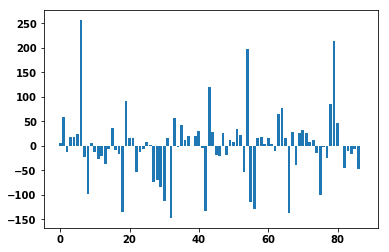

In [10]:
# モデルのあてはめ
# AICの結果からmaxlag=12としてラグは11
results11 = model.fit(maxlag=12, ic='aic')
# 残差
res11 = results11.resid
# 残差の出力
plt.bar(range(len(res11)), res11)

In [11]:
results11.k_ar

11

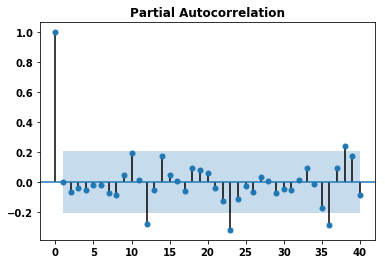

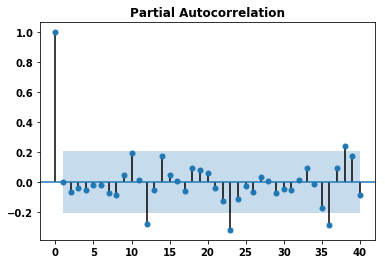

In [12]:
# 偏自己相関
tsaplots.plot_pacf(res11, lags=40)

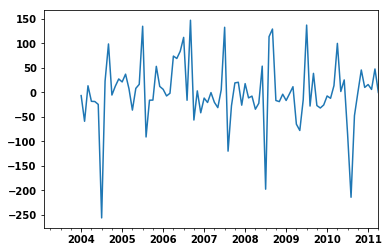

In [13]:
(results11.predict() - y_diff).plot()

C:\Users\sh70k\Anaconda3\envs\tsbook\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


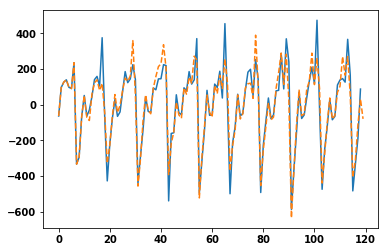

In [14]:
# 将来予測
# 原系列の表示
plt.plot(y.diff().dropna().values, label="observation")
# 1時点から11時点の原系列、モデルの当てはめに使用したデータ、
# AR(11)モデルによる推定値を連結した結果の表示
# np.hstack()はnp.concatenate()でもよい
plt.plot(np.hstack((y_diff[:11], 
                    results11.fittedvalues, 
                    results11.predict(98-11, 107, dynamic=True))), 
    '--', label="forecast")